In [1]:
import os
# Importing python librairies
import pandas as pd
import numpy as np
import sklearn as sl
# Importing DataViz librairies
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the dataset MAC
food = "/Users/remi/Documents/FoodFact/foodfact.csv"
df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [3]:
# Import the dataset PC
# food = "C:/Users/remid/Documents/_OC_ParcoursDataScientist/P3_Concevez_Une_Application_Au_Service_De_La_Sante_Publique/OpenFoodFact/foodfact.csv"
# df_food = pd.read_csv(food, sep="\t", low_memory=False)

In [4]:
# Observe the datas
df_food

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


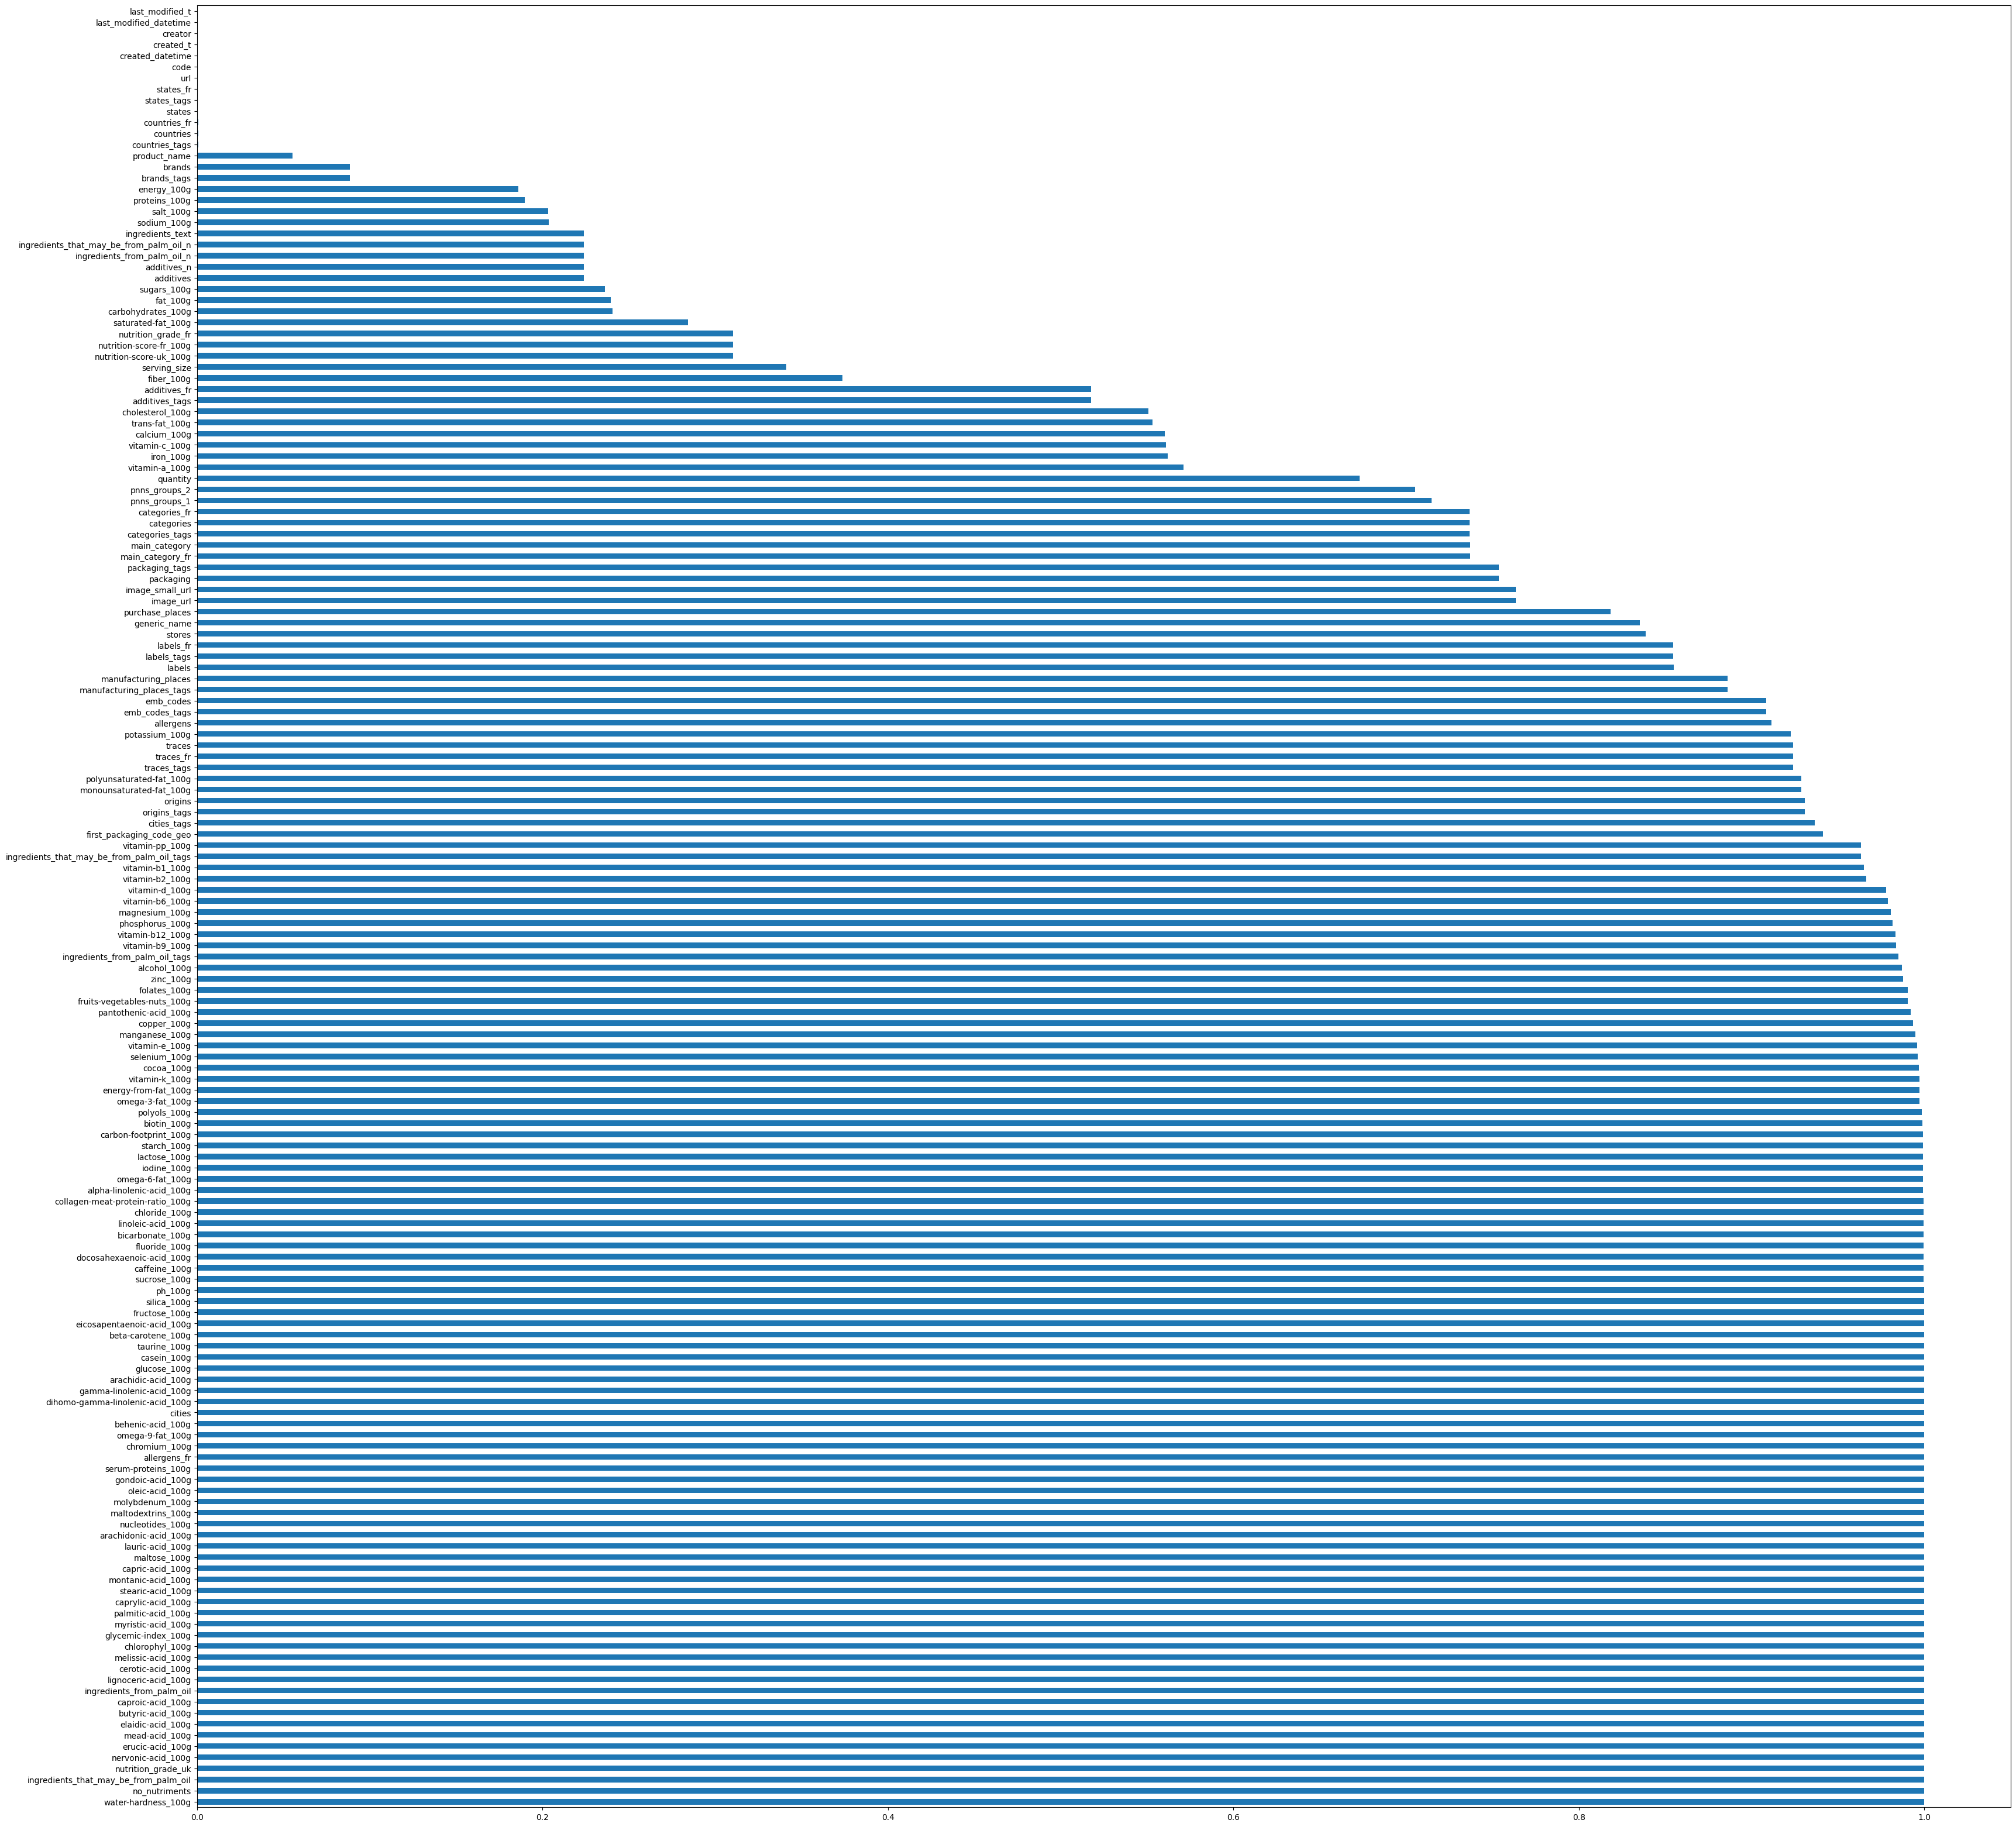

In [5]:
# Observation of zero values (average per column)
plt.figure(figsize=(40,40))
df_food.isna().mean().sort_values(ascending=False).plot.barh()
plt.show()

In [6]:
# Delete columns containing only null values
df_food.dropna(axis=1, how="all", inplace=True)

In [7]:
# Check columns containing < 80% null values and uncontaing "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (~df_food.columns.str.contains("100g"))].columns

Index(['generic_name', 'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr',
       'traces', 'traces_tags', 'traces_fr', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags'],
      dtype='object')

In [8]:
# Check columns containing < 80% null values and containg "100g"
df_food.loc[:, (df_food.isna().mean() > 0.8) & (df_food.columns.str.contains("100g"))].columns

Index(['energy-from-fat_100g', 'caprylic-acid_100g', 'capric-acid_100g',
       'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g',
       'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g',
       'montanic-acid_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g',
       'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
       'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g',
       'arachidonic-acid_100g', 'gamma-linolenic-acid_100g',
       'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g',
       'oleic-acid_100g', 'gondoic-acid_100g', 'sucrose_100g', 'glucose_100g',
       'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g',
       'starch_100g', 'polyols_100g', 'casein_100g', 'serum-proteins_100g',
       'nucleotides_100g', 'alcohol_100g', 'beta-carotene_100g',
       'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-b1_100g',
       'vitamin-b2_100g', 

In [9]:
# Check values on allergens column
df_food.loc[df_food["allergens"].notnull(),["code","allergens"]]

,code,allergens
184,0000007730009,"Blé, Beurre, Oeufs, Noisette"
218,0000020424640,"Vollmilchpulver, Vollmilchpulver, Soja, Butter..."
222,0000027533024,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
223,0000027533048,"Wheat Flour, Milk, Walnuts, Almonds, Nut, Whea..."
239,0000084154071,mostaza
...,...,...
320628,9556156046399,"soja, soja"
320648,9556417639339,blé
320652,9556587103869,blé
320701,96116845,"ORGE, CELERI"


In [10]:
# Check values on ingredients_from_palm_oil_tags column
df_food.loc[df_food["ingredients_from_palm_oil_tags"].notnull(),["code","ingredients_from_palm_oil_tags"]]

,code,ingredients_from_palm_oil_tags
509,00023092,huile-de-palme
1356,00099332,huile-de-palme
10372,0012009012168,huile-de-palme
11272,0014100096979,huile-de-palme
11273,0014100096986,huile-de-palme
...,...,...
320530,9555022300023,huile-de-palme
320531,9555022300030,huile-de-palme
320601,9556041610322,huile-de-palme
320648,9556417639339,huile-de-palme


In [11]:
# Check values on traces_fr column
df_food.loc[df_food["traces_fr"].notnull(),["code","traces_fr"]]

,code,traces_fr
47,0000000027083,"Œufs,Lait"
153,0000000050913,"Œufs,Gluten,Lait,Fruits à coque,Soja,Oatmeal,W..."
174,0000000290616,Contient-oeuf-lait-anchois-soya-ble-seigle-org...
180,0000001938067,"Soja,Anhydride sulfureux et sulfites,Contient-ble"
181,0000004302544,"Gluten,Peut-contenir-noix-varies-soya-lait-oeu..."
...,...,...
320591,9556041608411,"Poisson,Gluten,Mollusques,Soja"
320603,9556041611138,Soja
320604,9556041611978,Arachides
320652,9556587103869,"Œufs,Lait,Graines de sésame,Soja"


In [12]:
# Selection of columns potentially useful for analysis
columns_to_keep = ["allergens","traces_fr","ingredients_from_palm_oil_tags"]

In [13]:
# Selection of columns containing < 80% null values and columns_to_keep
df_food = df_food.loc[:, (df_food.isna().mean() < 0.8) | (df_food.columns.isin(columns_to_keep))]

In [14]:
# Describes data
df_food.shape

(320772, 57)

In [15]:
# Check columns
df_food.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'countries', 'countries_tags',
       'countries_fr', 'ingredients_text', 'allergens', 'traces_fr',
       'serving_size', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'image_url', 'image_small_url',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100

In [16]:
# Selection of columns to be deleted
columns_to_deleted = ["url","creator","created_t","created_datetime","last_modified_t","last_modified_datetime",
                      "packaging","packaging_tags","brands","brands_tags","categories","categories_tags","countries","countries_tags","serving_size",
                      "additives_n","additives","additives_tags","ingredients_from_palm_oil_tags","ingredients_that_may_be_from_palm_oil_n","states","states_tags","states_fr",
                      "main_category","image_url","image_small_url","nutrition-score-uk_100g"]

In [17]:
# Check the countries_tags column
df_food.loc[df_food["countries_tags"].notnull(),["countries_tags"]].drop_duplicates()

,countries_tags
0,en:france
1,en:united-states
47,en:united-kingdom
106,"en:france,en:united-states"
174,en:canada
...,...
320272,"en:australia,en:japan"
320385,en:maldives
320550,"en:australia,en:malaysia"
320633,"en:france,en:hong-kong"


In [18]:
# Select columns for analysis
df_food = df_food.drop(columns_to_deleted, axis=1)

<Axes: >

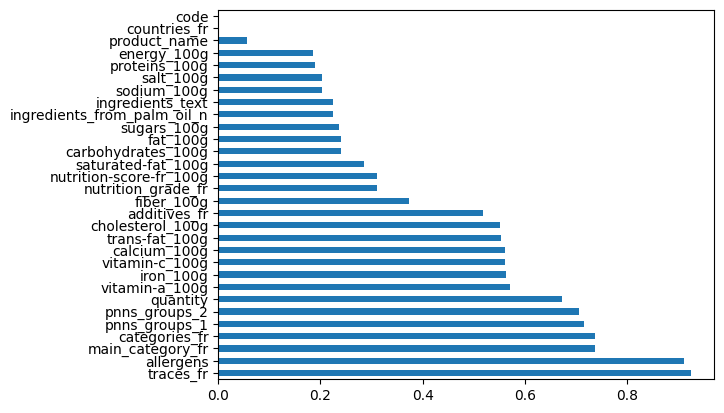

In [19]:
# Check for zero values for the final data set
df_food.isna().mean().sort_values(ascending=False).plot.barh()

In [20]:
# Replaces missing values with the empty string ("")
df_food["countries_fr"] = df_food["countries_fr"].fillna("")

In [21]:
# Check the countries_fr Saint-Martin
df_food.loc[df_food["countries_fr"].str.contains("Saint-Martin")]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
201901,3228020160093,Lait Demi-Écrémé,1l,"Produits laitiers,Laits,Homogenized milks,Past...",Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253941,3760138824158,Épices caraïbes,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320498,9501007301509,Penche KUBA,NaN,NaN,Saint-Martin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Instanciation of countries not french
other_countries = df_food.loc[~df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin"),["countries_fr"]].drop_duplicates()

In [23]:
# Check the all countries
other_countries["countries_fr"].unique()

array(['États-Unis', 'Royaume-Uni', 'Canada', 'Suisse', 'Espagne',
       'Allemagne', 'Slovénie', 'Italie', 'Roumanie', 'Australie',
       'Portugal', '', 'Royaume-Uni,États-Unis', 'Canada,États-Unis',
       'Pays-Bas', 'Irlande', 'Taiwan', 'Australie,Suisse', 'Brésil',
       'République dominicaine', 'États-Unis,en:Australie',
       'Arabie saoudite', 'Émirats arabes unis', 'Irak', 'Koweït',
       'Moldavie', 'Belgique', 'Singapour', 'Finlande',
       'Australie,États-Unis',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Panama', 'Costa Rica', 'Mexique', 'États-Unis,en:Pays-bas',
       'Espagne,Royaume-Uni,en:Scotland', 'Thaïlande', 'Chine',
       'Luxembourg', 'Liban', 'Suisse,États-Unis', 'Allemagne,États-Unis',
       'États-Unis,en:Deutschland', 'Belgique,Suisse,États-Unis',
       'Danemark,États-Unis,en:Spanien',
       'États-Unis,en:Belgie,en:Nederland', 'Belgique,Suisse',
       'Malaisie,États-Unis', 'Guyana,États-Unis', 'Serbie', 'Barba

In [24]:
# Data selection for French countries only
df_food_fr = df_food.loc[df_food["countries_fr"].str.contains("France|française|Guadeloupe|Nouvelle-Calédonie|Martinique|La Réunion|Polynésie française|Mayotte|Wallis-et-Futuna|Saint-Pierre-et-Miquelon|Saint-Martin")]

In [25]:
# Check the mean values per column
df_food_fr.isna().mean().sort_values(ascending=False)

trans-fat_100g                 0.996050
cholesterol_100g               0.995767
vitamin-a_100g                 0.994009
iron_100g                      0.987997
vitamin-c_100g                 0.986805
calcium_100g                   0.977126
traces_fr                      0.806108
allergens                      0.768555
additives_fr                   0.691335
fiber_100g                     0.537503
carbohydrates_100g             0.521894
fat_100g                       0.517479
ingredients_text               0.458213
ingredients_from_palm_oil_n    0.458213
nutrition-score-fr_100g        0.378670
nutrition_grade_fr             0.378670
main_category_fr               0.372265
categories_fr                  0.372265
saturated-fat_100g             0.368910
sugars_100g                    0.367455
sodium_100g                    0.366900
salt_100g                      0.366869
proteins_100g                  0.349037
energy_100g                    0.346239
pnns_groups_1                  0.342460


In [26]:
df_food_fr[df_food_fr["product_name"].isnull()]

,code,product_name,quantity,categories_fr,countries_fr,ingredients_text,allergens,traces_fr,additives_fr,ingredients_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
48,0000000027205,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0000007020254,NaN,NaN,Root-bier,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0000009336247,NaN,"46,7 g","Snacks sucrés,Confiseries,Bonbons",France,NaN,NaN,Œufs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,0000050157846,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,00003001,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320718,9688084817410,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,9800801107,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320746,9800895007,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,9800895250,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",France,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_food_fr = df_food_fr.dropna(subset="product_name")

In [28]:
# Check unique values on column trans-fat
df_food_fr["trans-fat_100g"].unique()

array([     nan, 0.00e+00, 1.16e+00, 5.00e-01, 2.17e-01, 3.03e-01,
       1.67e+00, 3.20e-01, 1.00e+00, 6.00e-02, 1.00e-01, 2.00e-01,
       7.14e+00, 4.00e-01, 3.00e-01, 1.60e-01, 1.20e-01, 2.00e-02,
       1.50e-01, 7.00e-01, 1.72e+01, 3.85e-01, 9.00e-01, 2.76e-01,
       3.00e-02, 2.10e-01, 1.30e-01, 1.78e+00, 4.00e-02, 6.70e-01,
       1.80e-01, 1.00e-02, 7.00e-02])

In [29]:
# Check the values upper 0 fortrans fat column
df_food_fr.loc[(df_food_fr["trans-fat_100g"].notnull()) & (df_food_fr["trans-fat_100g"] > 0),["code","product_name","trans-fat_100g"]].head(60)

,code,product_name,trans-fat_100g
15163,0019320015441,Shortbread Cookies,1.160
29122,0034000441037,Peanut butter cups,0.500
29130,0034000449095,Peanut Butter Cups Miniatures,0.500
67020,0061362460024,Kippered fillets,0.217
93406,0077330566223,Chocolate Chip Cookies,0.303
99796,0079813000118,Boursin Ail & Fines Herbes / Garlic & Fine Herbs,1.670
177460,20043001,"Favorina, Haselnuss Nougat Eier",0.320
184441,26008059,Margarine au tournesol,1.000
184452,26008912,Margarine allégée tournesol,1.000
190137,3038354210803,Extra Bolognese,0.060


In [30]:
# Check the uniqus values 
df_food_fr["pnns_groups_1"].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [31]:
# Check the unique values
df_food_fr["pnns_groups_2"].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products', 'Cheese',
       'Sweets', 'Sandwich', 'Appetizers', 'Dressings and sauces',
       'Dried fruits', 'Nuts', 'Breakfast cereals',
       'Pizza pies and quiche', 'Fruits', 'Fruit juices', 'Fats',
       'Alcoholic beverages', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Eggs',
       'Potatoes', 'Salty and fatty products', 'fruits', 'legumes',
       'cereals'], dtype=object)

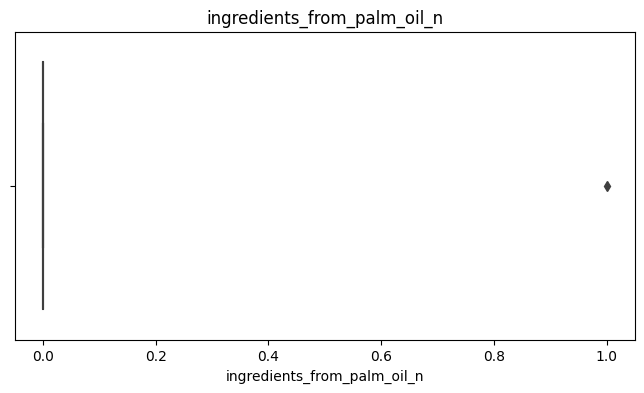

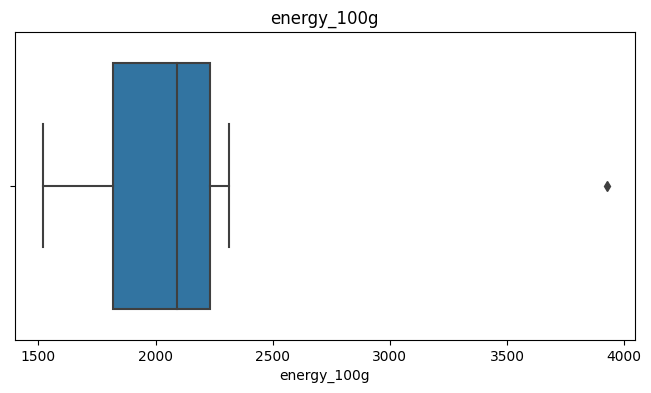

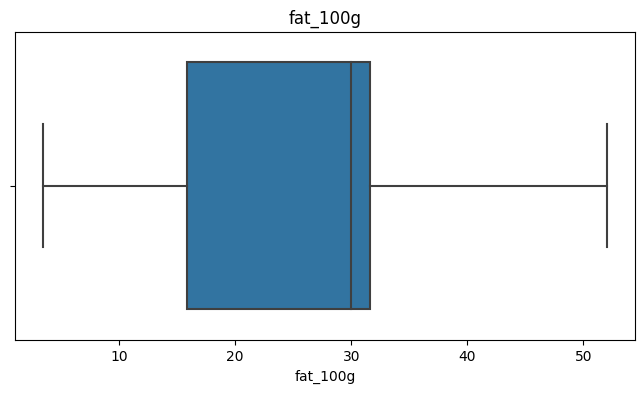

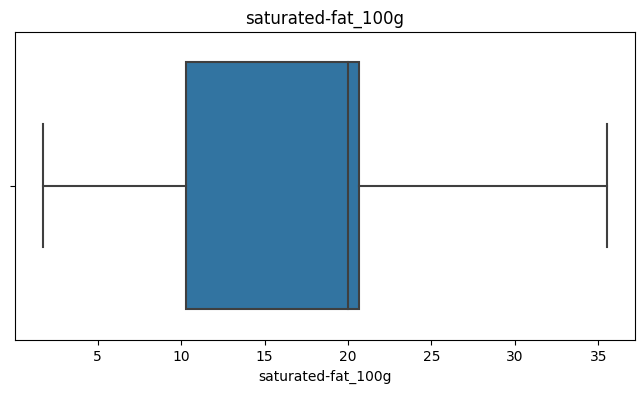

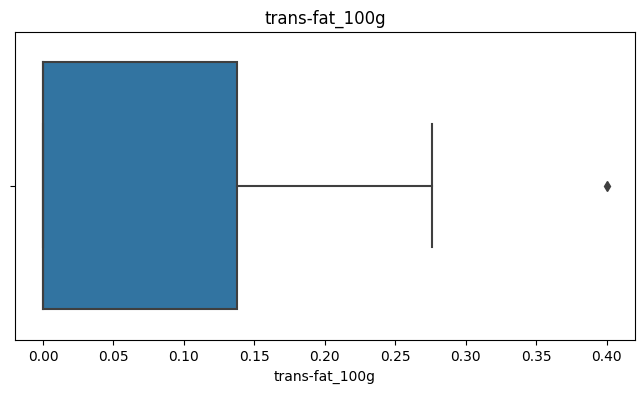

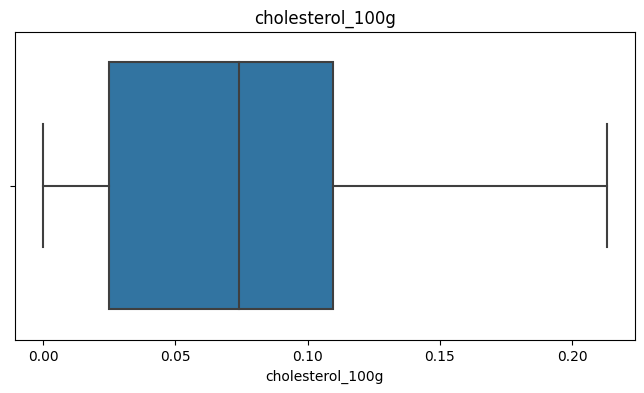

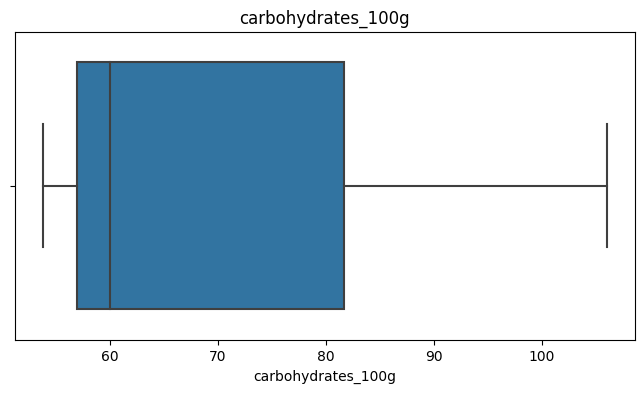

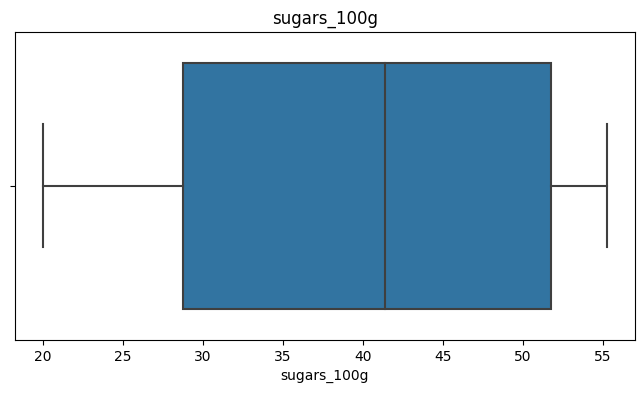

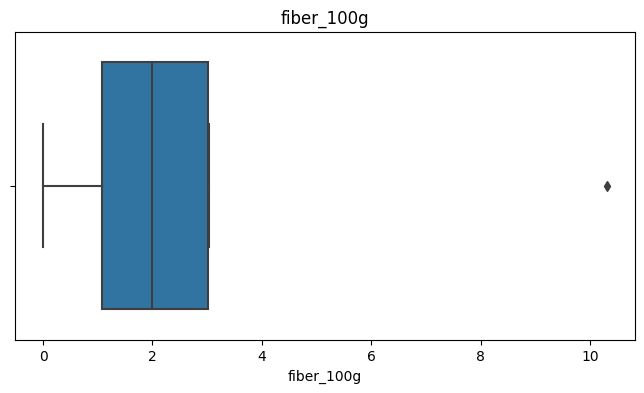

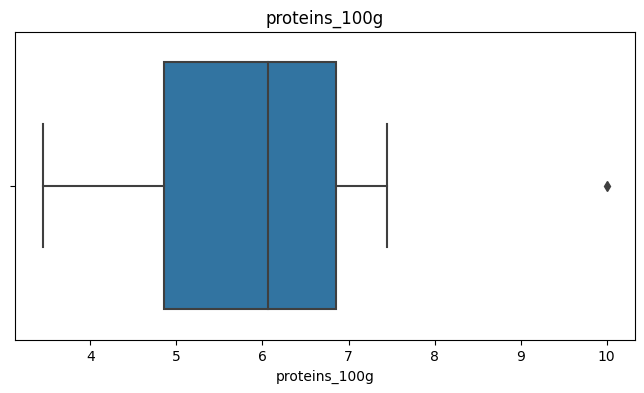

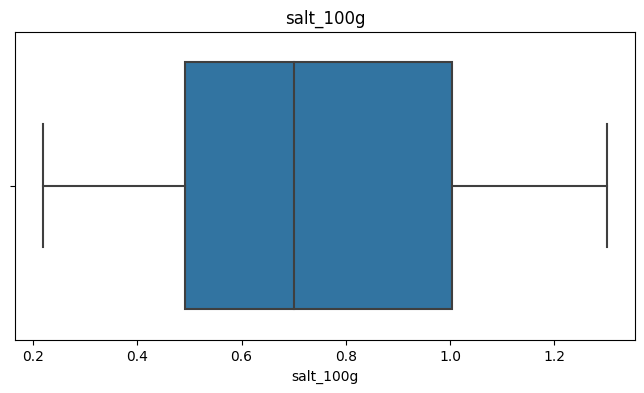

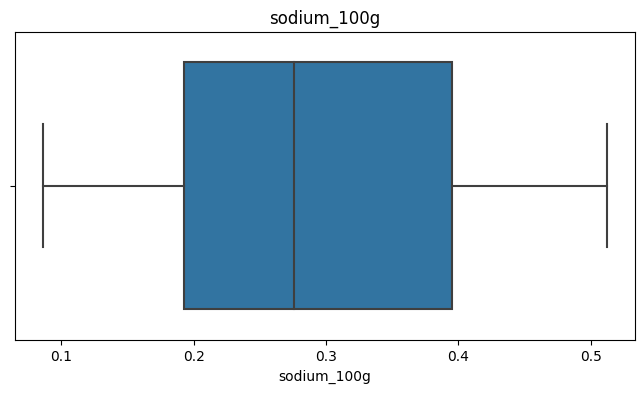

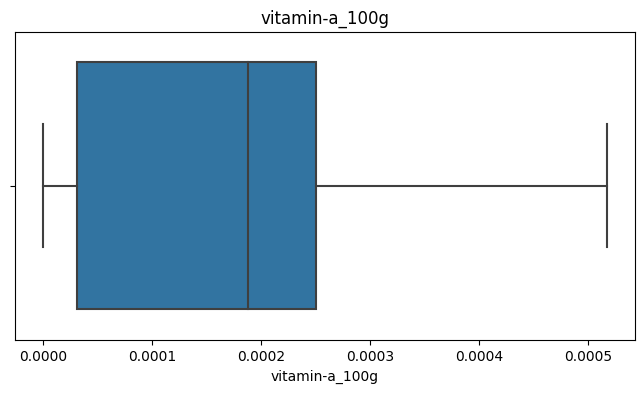

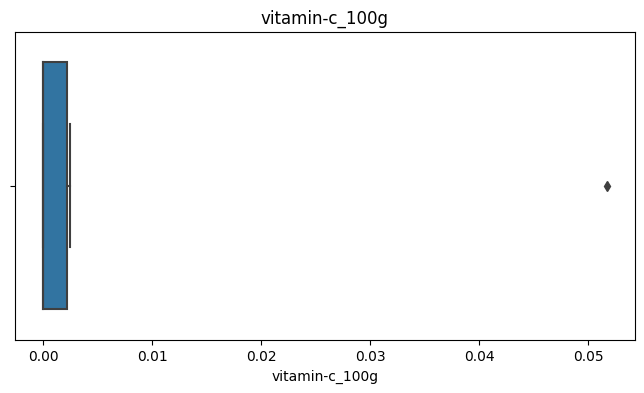

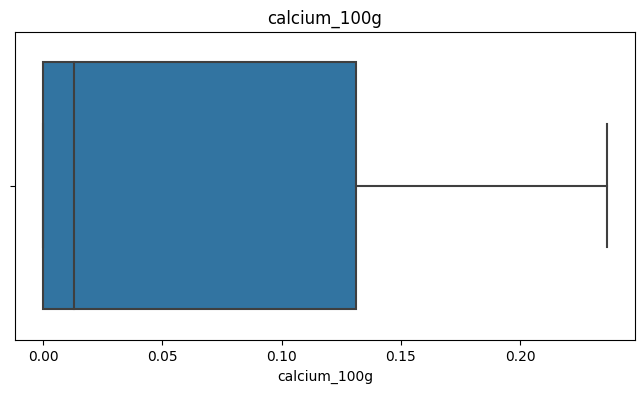

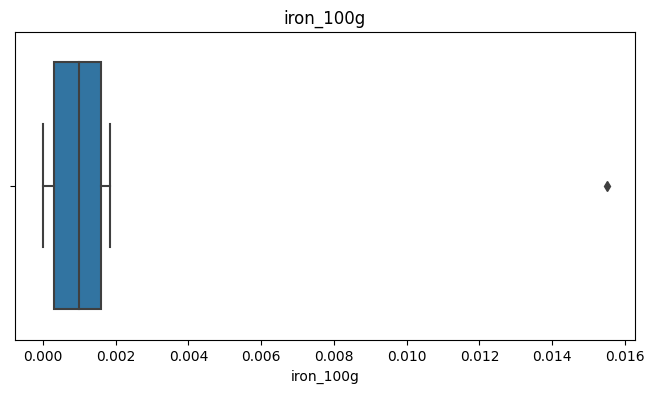

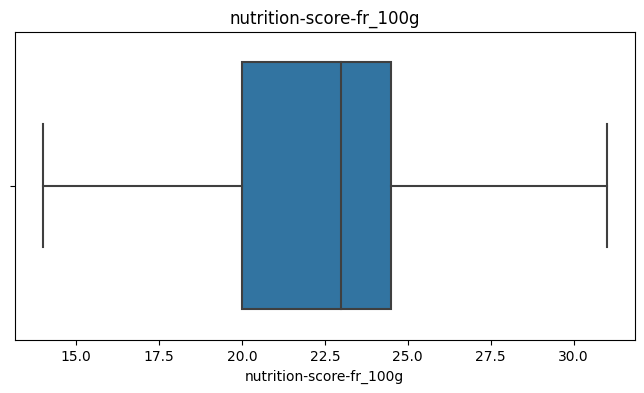

In [32]:
for col in df_food_fr.columns:
    if df_food_fr[col].dtype == "float":
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df_food_fr.dropna(), x=col, y=None)
        plt.title(col)
        plt.show()
    else:
        continue

In [33]:
outliers1 = df_food_fr.dropna(subset=['ingredients_from_palm_oil_n'])['ingredients_from_palm_oil_n']
outliers1

106       0.0
182       0.0
184       0.0
188       0.0
189       0.0
         ... 
320736    0.0
320743    0.0
320758    0.0
320763    0.0
320765    0.0
Name: ingredients_from_palm_oil_n, Length: 53559, dtype: float64

In [34]:
df_food_fr.columns

Index(['code', 'product_name', 'quantity', 'categories_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [35]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["energy_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["energy_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["energy_100g"])[(pd.Series(df_food_fr["energy_100g"]) < borne_inf) | (pd.Series(df_food_fr["energy_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
56561               5054.0
68125               3766.0
115021              3700.0
115370              3768.0
161426              3883.0
...                    ...
315860              3766.0
316993              3766.0
317235              3766.0
319695              5925.0
320561              4602.0

[490 rows x 1 columns]


In [36]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["trans-fat_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["trans-fat_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["trans-fat_100g"])[(pd.Series(df_food_fr["trans-fat_100g"]) < borne_inf) | (pd.Series(df_food_fr["trans-fat_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
15163                 1.16
29122                 0.50
29130                 0.50
99796                 1.67
184441                1.00
184452                1.00
195574                0.50
197885                1.00
197889                1.00
197891                1.00
205931                1.00
208578                7.14
208739                1.00
220084                0.70
221641               17.20
227183                0.90
227633                0.90
228574                1.00
228580                1.00
228581                1.00
228588                1.00
228589                1.00
228590                1.00
228598                1.00
228614                1.00
228626                1.00
237640                0.50
237946                0.50
239106                0.50
239218                0.70
239434                0.90
239644                0.50
241990                1.00
251313                1.78
256227                1.00
268206                0.67
2

In [37]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["fiber_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["fiber_100g"])[(pd.Series(df_food_fr["fiber_100g"]) < borne_inf) | (pd.Series(df_food_fr["fiber_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
495                   10.0
597                    8.3
10375                  9.9
11179                 11.0
13424                  9.7
...                    ...
320532                10.5
320534                11.8
320535                10.6
320741                10.0
320757                12.2

[2913 rows x 1 columns]


In [38]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["proteins_100g"])[(pd.Series(df_food_fr["proteins_100g"]) < borne_inf) | (pd.Series(df_food_fr["proteins_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
28476                 24.9
29113                 25.0
34626                 25.3
34632                 25.6
59306                 25.3
...                    ...
318230                70.9
318627                88.0
319192                28.2
319193                30.0
320309                32.0

[2545 rows x 1 columns]


In [39]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["proteins_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["proteins_100g"])[(pd.Series(df_food_fr["proteins_100g"]) < borne_inf) | (pd.Series(df_food_fr["proteins_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
28476                 24.9
29113                 25.0
34626                 25.3
34632                 25.6
59306                 25.3
...                    ...
318230                70.9
318627                88.0
319192                28.2
319193                30.0
320309                32.0

[2545 rows x 1 columns]


<Axes: ylabel='proteins_100g'>

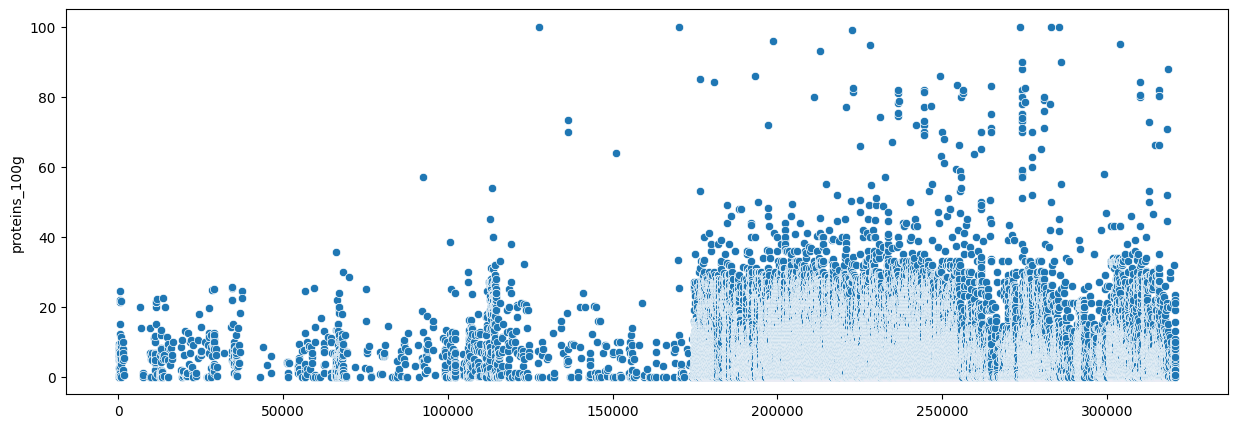

In [40]:
plt.figure(figsize=(15,5))
sns.scatterplot(df_food_fr["proteins_100g"])

In [41]:
# Calcul des bornes des valeurs aberrantes
Q1 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.25)
Q3 = pd.Series(df_food_fr["vitamin-c_100g"]).quantile(q=0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Extraction des valeurs aberrantes
valeurs_aberrantes = pd.Series(df_food_fr["vitamin-c_100g"])[(pd.Series(df_food_fr["vitamin-c_100g"]) < borne_inf) | (pd.Series(df_food_fr["vitamin-c_100g"]) > borne_sup)]

# Affichage des valeurs aberrantes sous forme de DataFrame
df_valeurs_aberrantes = pd.DataFrame({'Valeurs aberrantes': valeurs_aberrantes})

print(df_valeurs_aberrantes)

        Valeurs aberrantes
13161               0.0745
161015              7.5000
161016              3.0000
174641              0.1000
176140              0.1500
...                    ...
292548              0.0650
295141              0.0800
301304              0.0680
306601              0.0930
320556              0.0850

[140 rows x 1 columns]


In [42]:
df_food_fr.columns

Index(['code', 'product_name', 'quantity', 'categories_fr', 'countries_fr',
       'ingredients_text', 'allergens', 'traces_fr', 'additives_fr',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

<Axes: ylabel='energy_100g'>

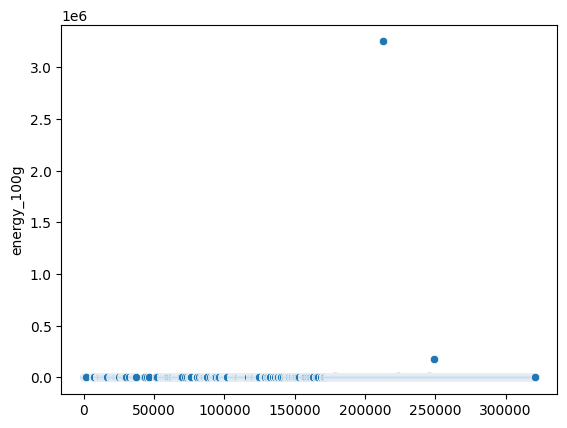

In [43]:
sns.scatterplot(df_food_fr["energy_100g"])

In [44]:
df_food_fr[df_food_fr["energy_100g"] > 4000][["product_name","energy_100g"]].sort_values("energy_100g",ascending=False).head(50)

,product_name,energy_100g
212928,Pois cassés,3251373.0
249101,"Légume Noisettes Carottes, 500 Grammes, Marque...",182764.0
245311,mini choux goût fromage de chèvre - poivre,18700.0
223318,Huiles vierge biologique de Colza - première p...,15481.0
178787,Halva with Almonds,9983.0
224442,Croûtons à l'ail,9050.0
218448,300G TARTINABLE a LA NOISETTE,7339.0
250717,Gruyère France au lait cru (33% MG),7029.0
240071,Emmental français râpé au lait cru,6803.0
219497,16 Mignardises Création,6393.0


## Outliers - Vitamines

<Axes: ylabel='vitamin-c_100g'>

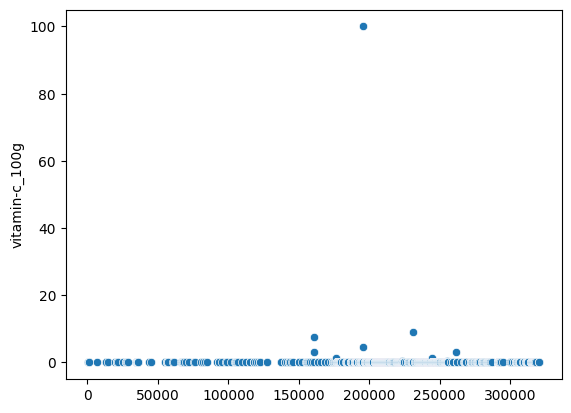

In [45]:
sns.scatterplot(df_food_fr["vitamin-c_100g"])

In [46]:
df_food_fr[df_food_fr["vitamin-c_100g"] > 80][["product_name","vitamin-c_100g"]]

,product_name,vitamin-c_100g
195747,Juvamine Vitamine C500 à croquer sans sucres,100.0


In [47]:
df_food_fr[df_food_fr["vitamin-c_100g"] < 80][["product_name","vitamin-c_100g"]].sort_values("vitamin-c_100g",ascending=False)

,product_name,vitamin-c_100g
231048,Centrum Men,9.02
161015,"Coconut Liquid Water Enhancer, Original",7.50
195726,Junior Vitamine C & Calcium goût Fraise à croquer,4.71
261524,CitroBiotic,3.00
161016,Liquid Water Enhancer,3.00
...,...,...
150141,"4 petits carrés a 3 étages au beurre, pointe d...",0.00
155124,Sirop d'érable pur,0.00
60623,S.Pellegrino,0.00
156398,Vivaloé Honeydew Aloe,0.00


In [48]:
df_food_fr["vitamin-c_100g"].dtypes

dtype('float64')

## Outliers - Iron

<Axes: ylabel='iron_100g'>

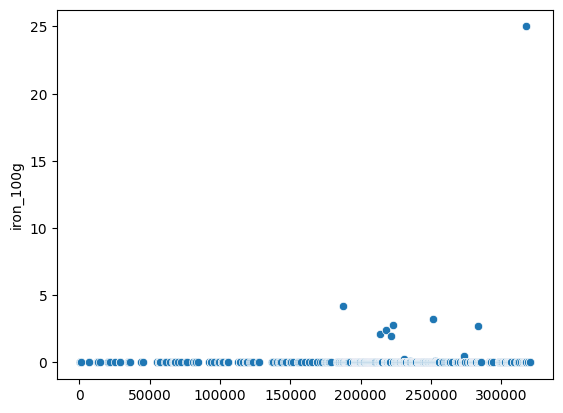

In [49]:
sns.scatterplot(df_food_fr["iron_100g"])